## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data Preparation
The dataset that we will use on this project is Marketing and Product Performance. We got the dataset from Kaggle: https://www.kaggle.com/datasets/imranalishahh/marketing-and-product-performance-dataset?resource=download.

Below are the columns with the descriptions of each column:

Company
* Campaign_ID: Unique identifier for each marketing campaign.
* Product_ID: Unique identifier for each product.
* Budget:Campaign budget in USD.
* Clicks:	Number of clicks the campaign generated.
* Conversions:	Number of successful conversions from the campaign.
* Revenue_Generated:	Total revenue generated by the campaign in USD.
* ROI:	Return on Investment (ratio of revenue to budget).

Customer
* Customer_ID:	Unique identifier for each customer.
* Subscription_Tier:	Customer's subscription level: Basic, Standard, or Premium.
* Subscription_Length:	Length of customer subscription in months (1–36).
* Flash_Sale_ID:	Unique identifier for flash sales associated with the campaign.
* Discount_Level:	Discount percentage offered during the campaign (10–70%).
* Units_Sold:	Total units sold as a result of the campaign.
* Bundle_ID:	Unique identifier for product bundles sold in the campaign.
* Bundle_Price:	Price of the product bundle in USD (ranges between $50 and $500).
* Customer_Satisfaction_Post_Refund:	Customer satisfaction score after refunds, on a scale of 1 to 5.


# Load Dataset

In [ ]:
# load dataset and show the first five sample
df = pd.read_csv("https://raw.githubusercontent.com/feliciastevany/DataMining-Datasets/refs/heads/main/marketing_and_product_performance.csv")
df.head()

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


Check unique values for Subscription_Tier and Common_Keywords column

In [ ]:
print('Subscription_Tier:', df['Subscription_Tier'].unique())
print('Common_Keywords:', df['Common_Keywords'].unique())

Subscription_Tier: ['Premium' 'Basic' 'Standard']
Common_Keywords: ['Affordable' 'Innovative' 'Durable' 'Stylish']


Check if there are any missing values in the dataset

In [ ]:
# Check for null values in the dataset
missing_values = df.isnull().sum()
missing_values
# As shown, there are no missing values on all the columns.

,0
Campaign_ID,0
Product_ID,0
Budget,0
Clicks,0
Conversions,0
Revenue_Generated,0
ROI,0
Customer_ID,0
Subscription_Tier,0
Subscription_Length,0


## Data Cleaning

Drop some unecessary columns

In [ ]:
id_columns = ['Campaign_ID']
df_cleaned = df.drop(columns=id_columns)
df_cleaned.head()

,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


## Exploratory Data Analysis (EDA)

Showing the columns information including datatype of each column

In [ ]:
df_cleaned.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25263.607524,2481.903600,498.978700,50038.627579,2.756365,18.016500,39.421000,100.689600,275.198346,2.500900
std,14350.085927,1435.973623,289.479495,28545.702337,1.296901,10.149666,17.212925,57.074015,129.218710,1.113249
min,500.440000,10.000000,1.000000,1002.080000,0.500000,1.000000,10.000000,1.000000,50.010000,1.000000
25%,12789.190000,1225.750000,247.000000,25264.255000,1.630000,9.000000,24.000000,52.000000,165.717500,2.000000
50%,25030.170000,2451.000000,499.000000,49513.815000,2.750000,18.000000,39.000000,101.000000,272.555000,2.000000
75%,37921.725000,3723.000000,751.000000,74507.157500,3.890000,27.000000,54.000000,150.000000,387.322500,3.000000
max,49999.630000,4999.000000,999.000000,99999.470000,5.000000,35.000000,69.000000,199.000000,499.970000,4.000000


In [ ]:
df_cleaned.info() # Showing the info of all the column including datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Product_ID                         10000 non-null  object 
 1   Budget                             10000 non-null  float64
 2   Clicks                             10000 non-null  int64  
 3   Conversions                        10000 non-null  int64  
 4   Revenue_Generated                  10000 non-null  float64
 5   ROI                                10000 non-null  float64
 6   Customer_ID                        10000 non-null  object 
 7   Subscription_Tier                  10000 non-null  object 
 8   Subscription_Length                10000 non-null  int64  
 9   Flash_Sale_ID                      10000 non-null  object 
 10  Discount_Level                     10000 non-null  int64  
 11  Units_Sold                         10000 non-null  int6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Feature Engineering

In [ ]:
# Create new feature representing the relationship between Units Sold and Customer Satisfaction
df_cleaned['Units_Per_Satisfaction'] = df_cleaned['Units_Sold'] / df_cleaned['Customer_Satisfaction_Post_Refund']
df_cleaned['Units_Discount_Interaction'] = df_cleaned['Units_Sold'] * df_cleaned['Discount_Level']
df_cleaned['Budget_Effectiveness'] = df_cleaned['Revenue_Generated'] / df_cleaned['Budget']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_cleaned.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords,Units_Per_Satisfaction,Units_Discount_Interaction,Budget_Effectiveness
0,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable,8.5,1462,0.371557
1,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative,48.5,2716,1.032281
2,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable,40.0,8160,1.456832
3,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable,159.0,5724,3.195861
4,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable,26.0,1040,2.260110


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Product_ID                         10000 non-null  object 
 1   Budget                             10000 non-null  float64
 2   Clicks                             10000 non-null  int64  
 3   Conversions                        10000 non-null  int64  
 4   Revenue_Generated                  10000 non-null  float64
 5   ROI                                10000 non-null  float64
 6   Customer_ID                        10000 non-null  object 
 7   Subscription_Tier                  10000 non-null  object 
 8   Subscription_Length                10000 non-null  int64  
 9   Flash_Sale_ID                      10000 non-null  object 
 10  Discount_Level                     10000 non-null  int64  
 11  Units_Sold                         10000 non-null  int6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Visualization

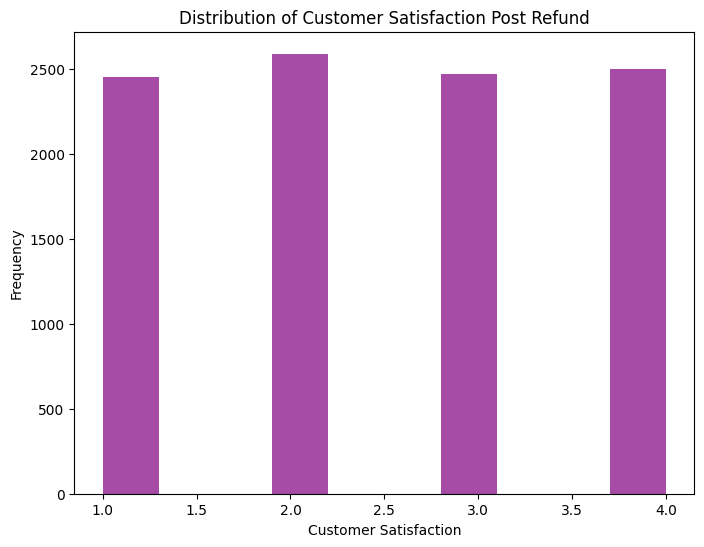

In [ ]:
# Histogram for Customer Satisfaction Post Refund
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['Customer_Satisfaction_Post_Refund'], bins=10, color='purple', alpha=0.7)
plt.title('Distribution of Customer Satisfaction Post Refund')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Frequency')
plt.show()

# Histogram menunjukkan seberapa puas pelanggan setelah menerima refund, berdasarkan skor kepuasan mereka.
# Frekuensi yang tinggi pada kotak skor yang lebih tinggi berarti pelanggan secara umum puas dengan proses refund.

<ipython-input-46-b41ebeb9b475>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Common_Keywords", y="Revenue_Generated", data=revenue_by_keyword, palette="coolwarm")


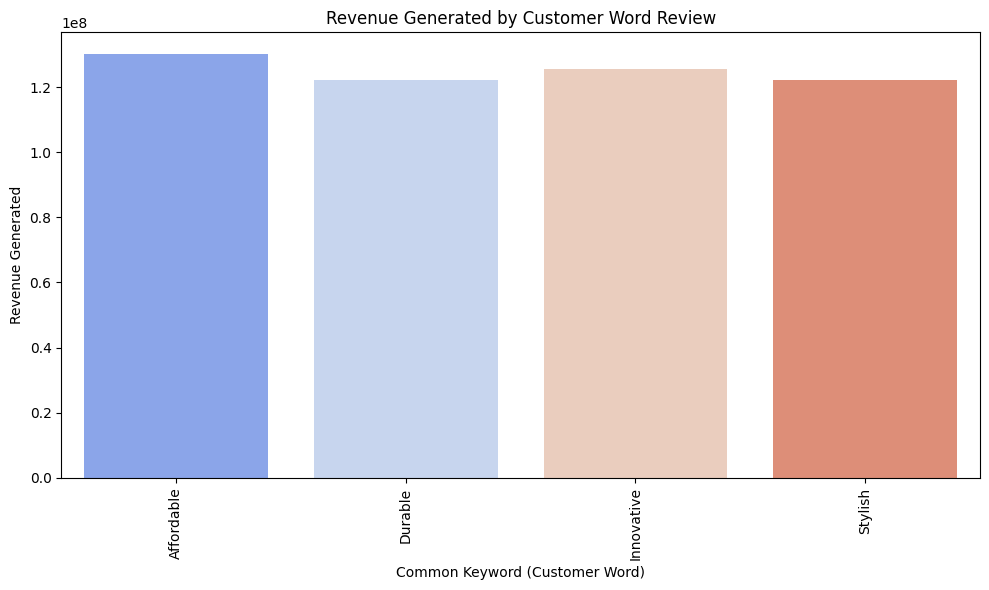

In [ ]:
# Displays the average customer satisfaction for each keyword.
# Grouping by Common_Keywords and summing the Revenue_Generated
revenue_by_keyword = df_cleaned.groupby("Common_Keywords")["Revenue_Generated"].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="Common_Keywords", y="Revenue_Generated", data=revenue_by_keyword, palette="coolwarm")
plt.title("Revenue Generated by Customer Word Review")
plt.xlabel("Common Keyword (Customer Word)")
plt.ylabel("Revenue Generated")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Barchart membantu memvisualisasikan hubungan antara kata kunci dan pendapatan,
#sehingga memungkinkan perusahaan untuk memfokuskan upayanya pada kata kunci yang paling menguntungkan.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-1655-09e8b0854c09>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Amount', data=summary_df, palette='Blues')


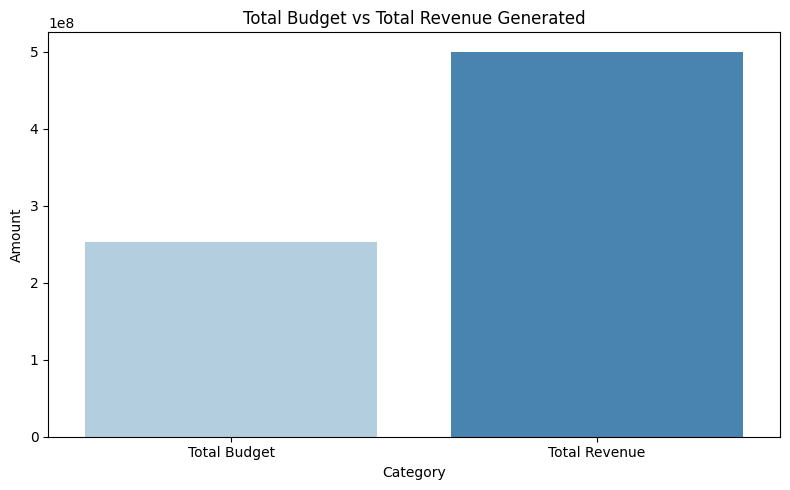

In [ ]:
# Sum of Budget and Revenue Generated
total_budget = df_cleaned['Budget'].sum()
total_revenue = df_cleaned['Revenue_Generated'].sum()

# Create a DataFrame for plotting
summary_df = pd.DataFrame({
    'Category': ['Total Budget', 'Total Revenue'],
    'Amount': [total_budget, total_revenue]
})

# Create a bar plot to compare the sums
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Amount', data=summary_df, palette='Blues')
plt.title("Total Budget vs Total Revenue Generated")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` varia

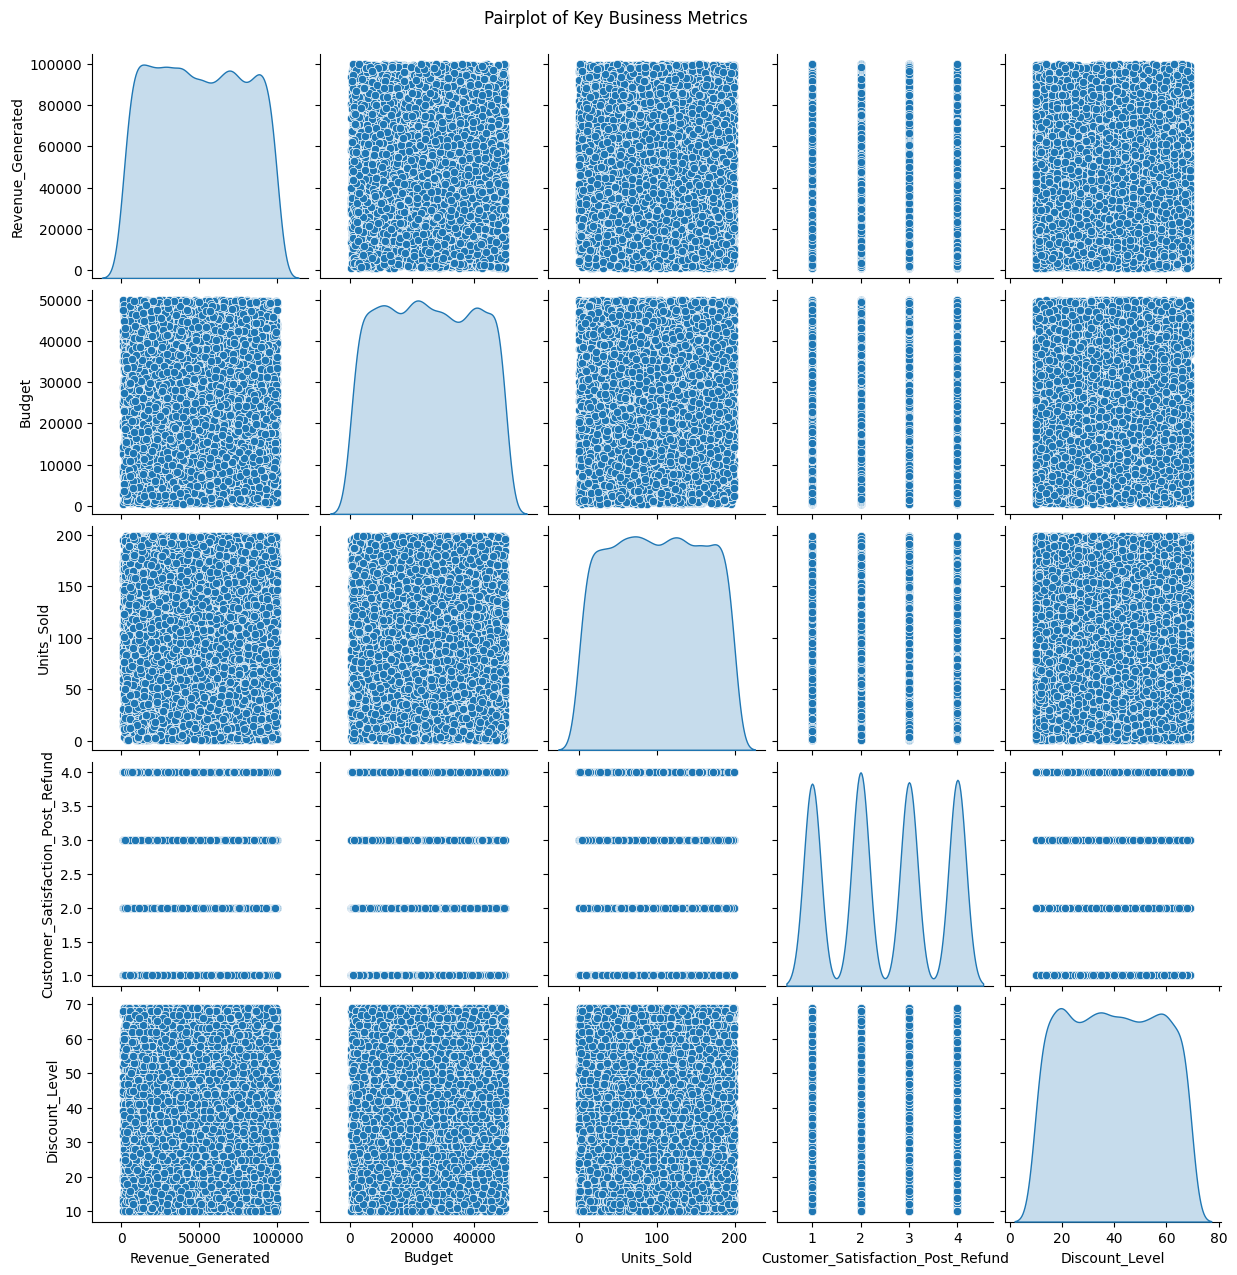

In [ ]:
# Select features for the pairplot
features = ['Revenue_Generated', 'Budget', 'Units_Sold', 'Customer_Satisfaction_Post_Refund', 'Discount_Level']

# Create the pairplot
sns.pairplot(df_cleaned[features], diag_kind='kde', palette='husl')
plt.suptitle("Pairplot of Key Business Metrics", y=1.02)
plt.show()

#pairplot menyediakan matriks scatterplot dan plot distribusi untuk fitur yang dipilih
#Cth: Units_Sold vs. Discount_Level:
#Pengelompokan atau pengelompokan kecil mungkin terlihat, yang menunjukkan bahwa tingkat diskon tertentu dapat memengaruhi unit yang terjual.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


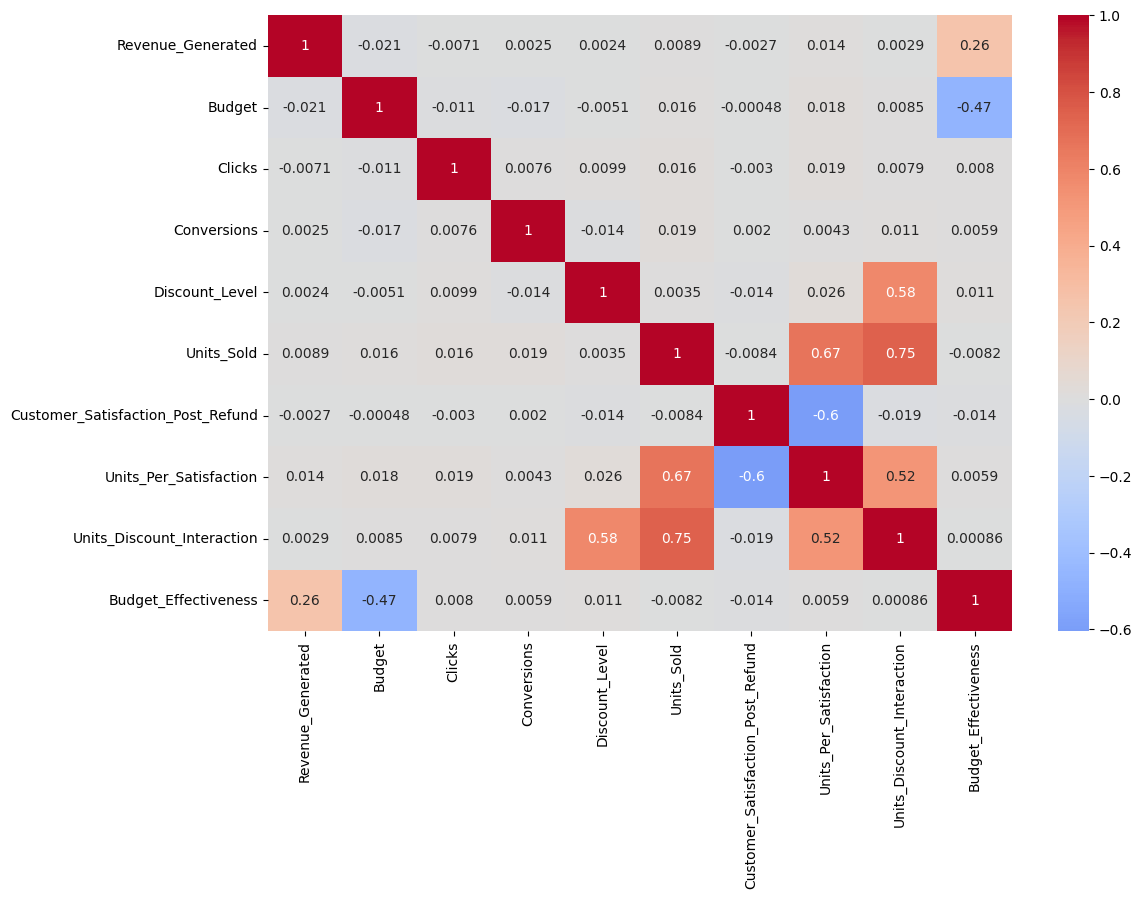

In [ ]:
# Select relevant features for the heatmap
heatmap_features = [
    "Revenue_Generated",
    "Budget",
    "Clicks",
    "Conversions",
    "Discount_Level",
    "Units_Sold",
    "Customer_Satisfaction_Post_Refund",
    "Units_Per_Satisfaction",
    "Units_Discount_Interaction",
    "Budget_Effectiveness"
]

# Compute the correlation matrix
corr_matrix = df_cleaned[heatmap_features].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True, cmap="coolwarm", center=0)
plt.show()
#Heatmap memvisualisasikan korelasi antara fitur-fitur berbeda dalam kumpulan data.
#Korelasi negatif dengan budget menunjukkan bahwa pengeluaran yang lebih tinggi mungkin tidak selalu menghasilkan keuntungan yang proporsional.
#Mengoptimalkan alokasi anggaran dapat meningkatkan perolehan pendapatan.

## Data Encoding

In [ ]:
df_encoded = df_cleaned.copy()

# Apply Label Encoding to 'Common_Keywords' and 'Subscription_Tier' to convert them into numeric values
label_encoder = LabelEncoder()
df_encoded['Customer_ID'] = label_encoder.fit_transform(df_encoded['Customer_ID'])
df_encoded['Product_ID'] = label_encoder.fit_transform(df_encoded['Product_ID'])
df_encoded['Flash_Sale_ID'] = label_encoder.fit_transform(df_encoded['Flash_Sale_ID'])
df_encoded['Bundle_ID'] = label_encoder.fit_transform(df_encoded['Bundle_ID'])
df_encoded['Common_Keywords'] = label_encoder.fit_transform(df_encoded['Common_Keywords'])
df_encoded['Subscription_Tier'] = label_encoder.fit_transform(df_encoded['Subscription_Tier'])

df_encoded.head()

,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,4765,41770.45,4946,73,15520.09,1.94,440,1,4,501,43,34,630,433.80,4,0
1,6722,29900.93,570,510,30866.17,0.76,100,1,4,427,28,97,8477,289.29,2,2
2,1332,22367.45,3546,265,32585.62,1.41,3329,0,9,5305,51,160,138,462.87,4,0
3,2752,29957.54,2573,781,95740.12,3.32,1943,1,32,488,36,159,2925,334.16,1,1
4,4172,36277.19,818,79,81990.43,3.53,9244,2,29,2881,20,52,7439,371.67,2,0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Product_ID                         10000 non-null  int64  
 1   Budget                             10000 non-null  float64
 2   Clicks                             10000 non-null  int64  
 3   Conversions                        10000 non-null  int64  
 4   Revenue_Generated                  10000 non-null  float64
 5   ROI                                10000 non-null  float64
 6   Customer_ID                        10000 non-null  int64  
 7   Subscription_Tier                  10000 non-null  int64  
 8   Subscription_Length                10000 non-null  int64  
 9   Flash_Sale_ID                      10000 non-null  int64  
 10  Discount_Level                     10000 non-null  int64  
 11  Units_Sold                         10000 non-null  int6

Apply feature scaling to the data

In [ ]:
#reduce dataset to 500 because it's too big to process
df_sampled = df_encoded.sample(n=500)

# Initialize the scaler
sc = StandardScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(sc.fit_transform(df_sampled), columns=df_sampled.columns)

# Display the first few rows of the inverse-transformed dataframe
df_scaled.head()

,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,1.650325,0.723571,-0.264754,-0.570576,1.373619,-0.545235,-0.848744,-0.012182,1.639103,1.449996,-0.128156,-0.026063,-0.669170,0.778323,-0.385496,0.474921
1,-0.275115,-0.054192,-1.171886,0.605731,0.848866,0.759302,-0.459251,-1.230336,-1.154713,1.454354,1.333479,1.659323,1.067400,-1.544625,1.358829,0.474921
2,0.061898,-1.339347,1.673658,-0.053001,1.360080,0.288434,0.241974,1.205973,-0.673021,0.159802,-0.186622,0.877443,-1.384270,1.154358,-1.257658,0.474921
3,-0.113237,0.139771,-0.218198,1.281267,-1.630328,0.041421,0.015849,-0.012182,-1.540067,-0.335963,1.216549,0.755817,0.185316,-1.357293,1.358829,0.474921
4,0.436241,-1.383141,0.312960,1.546776,-0.802093,1.685601,1.512431,-0.012182,1.446426,1.133900,-0.420483,1.138069,1.317179,1.571761,0.486666,0.474921


# Classification

Spliting X and Y

In [ ]:
# X is the predicting variable, and y is the predicted variable (target)
X = df_sampled.drop(['Common_Keywords'], axis = 1)
y = df_sampled['Common_Keywords']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Split data into training and test set (test size 20% and random state 42)

In [ ]:
# Splitting the data to traning and test using train test, with test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


check the shape of X_train and X_test

In [ ]:
# Checking how many rows and columns in each train and test data
X_train.shape, X_test.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((400, 18), (100, 18))

In [ ]:
# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.Clas

## Desicion Tree

---

1. Criterion Entropy

Define the model

In [ ]:
# Modelling using criterion entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf_entropy.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

Predict the test set results <br>

In [ ]:
# Predict X-test with creation entropy model
y_pred_entropy = clf_entropy.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Check accuracy score <br>

In [ ]:
# Accuracy score using y_test and y_pred
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_entropy)) # Showing accuracy score using y_test and y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model accuracy score with criterion entropy: 0.2200


Check for overfitting and underfitting <br>

In [ ]:
y_train_entropy = clf_entropy.predict(X_resampled)

# Accuracy for test and train using creation entropy model
test_accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
training_accuracy_entropy = accuracy_score(y_resampled, y_train_entropy)

# Showing testing and training accuracy based on train and test data
print('Testing accuracy: {0:0.4f}'.format(test_accuracy_entropy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy_entropy))



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Testing accuracy: 0.2200
Training accuracy: 0.4060


Visualize decision trees <br>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


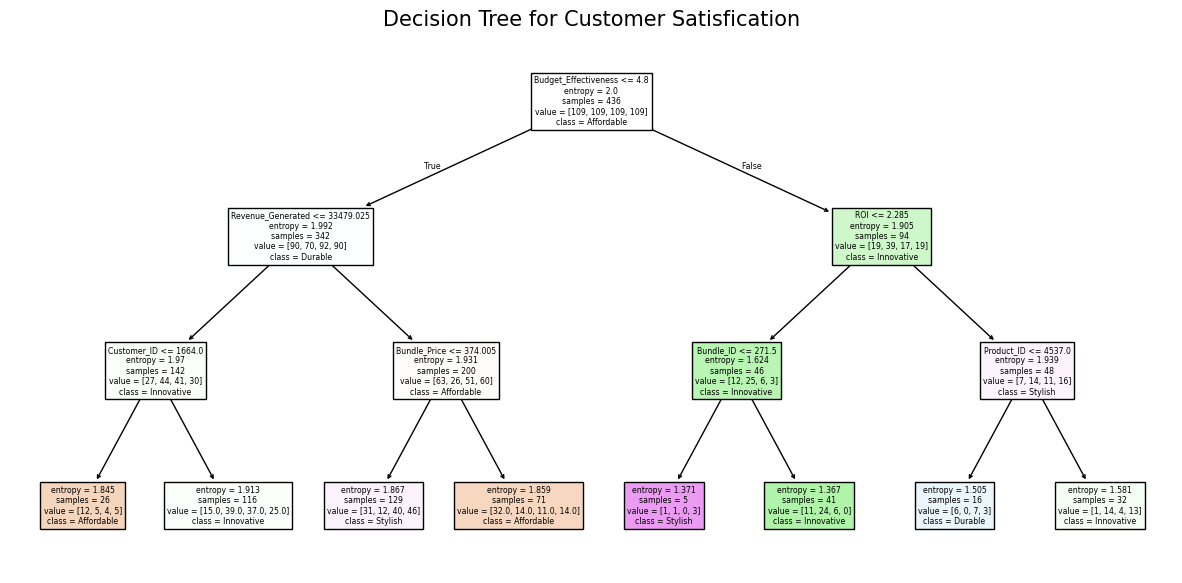

In [ ]:
# Plot the tree using the criterion entropy model
plt.figure(figsize=(15,7))
tree.plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Affordable', 'Innovative', 'Durable', 'Stylish'])
plt.title("Decision Tree for Customer Satisfication", fontsize=15)
plt.show()

2. Gini Index

Define the model

In [ ]:
# Modelling using criterion gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=42)
clf_gini.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier(max_depth=3, random_state=42)

Predict the test set results

In [ ]:
# Predict X-test with criterion gini model
y_pred_gini = clf_gini.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Check accuracy score

In [ ]:
# Accuracy score using y_test and y_pred
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_gini)) # Showing accuracy score using y_test and y_pred

Model accuracy score with criterion gini: 0.2300


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Check for overfitting and underfitting



In [ ]:
y_train_gini = clf_gini.predict(X_resampled)

# Accuracy for test and train using criterion gini model
test_accuracy_gini = accuracy_score(y_test, y_pred_gini)
training_accuracy_gini = accuracy_score(y_resampled, y_train_gini)

# Showing testing and training accuracy based on train and test data
print('Testing accuracy: {0:0.4f}'.format(test_accuracy_gini))
print('Training accuracy: {0:0.4f}'.format(training_accuracy_gini))

Testing accuracy: 0.2300
Training accuracy: 0.4060


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Visualize Gini Index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


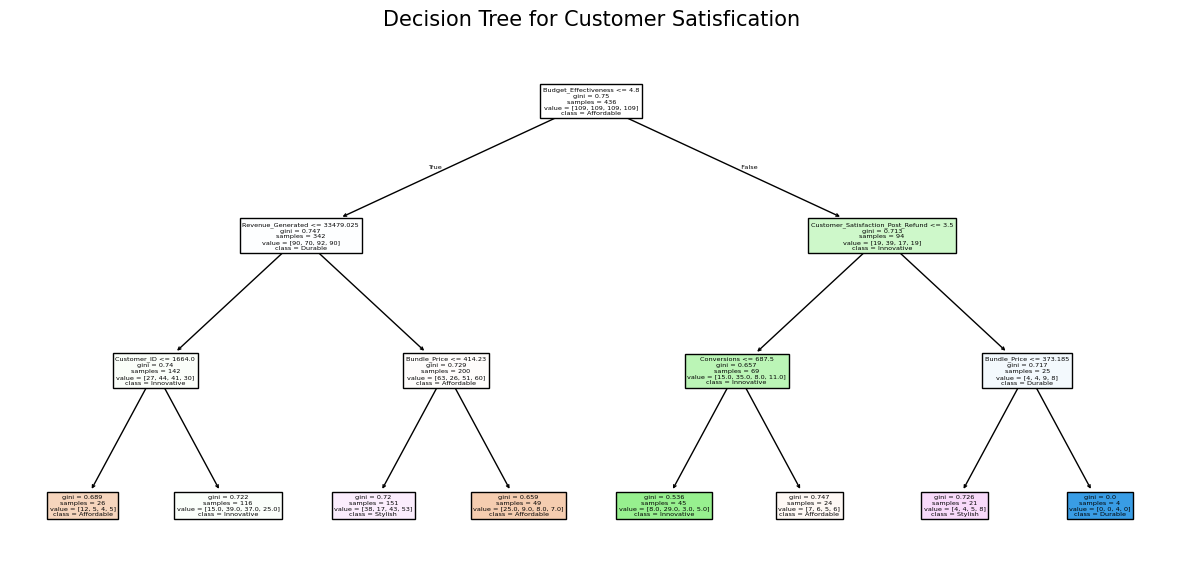

In [ ]:
# Plot the tree for the criterion gini model
plt.figure(figsize=(15,7))
tree.plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Affordable', 'Innovative', 'Durable', 'Stylish'])
plt.title("Decision Tree for Customer Satisfication", fontsize=15)
plt.show()

---
Confusion Matrix of Criterion Entropy and Gini Index <br>

In [ ]:
# Confusion matrix of criterion entropy and criterion gini model
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix (Entropy):\n", cm_entropy)
print("Confusion Matrix (Gini):\n", cm_gini)

Confusion Matrix (Entropy):
 [[ 3 10  1 12]
 [12  9  3  9]
 [ 3  9  0  6]
 [ 4  7  2 10]]
Confusion Matrix (Gini):
 [[ 4  8  0 14]
 [11  7  0 15]
 [ 3  9  0  6]
 [ 2  8  1 12]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Classification report of Criterion Entropy and Gini Index <br>

In [ ]:
# Classification report of criterion entropy and criterion gini model
clf_report_entropy = classification_report(y_test, y_pred_entropy)
clf_report_gini = classification_report(y_test, y_pred_gini)

print("Classification Report Entropy: \n", clf_report_entropy)
print("Classification Report Gini Index: \n", clf_report_gini)

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.14      0.12      0.12        26
           1       0.26      0.27      0.26        33
           2       0.00      0.00      0.00        18
           3       0.27      0.43      0.33        23

    accuracy                           0.22       100
   macro avg       0.17      0.21      0.18       100
weighted avg       0.18      0.22      0.20       100

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.20      0.15      0.17        26
           1       0.22      0.21      0.22        33
           2       0.00      0.00      0.00        18
           3       0.26      0.52      0.34        23

    accuracy                           0.23       100
   macro avg       0.17      0.22      0.18       100
weighted avg       0.18      0.23      0.20       100



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Results and conclusion <br>

In [ ]:
# Kedua model decision tree (dengan kriteria Entropy dan Gini) menunjukkan performa yang buruk, dengan akurasi keseluruhan dan F1-score jauh di bawah tingkat
# yang dapat diterima. Model gagal menangani dataset secara efektif, seperti yang ditunjukkan oleh recall, precision, dan ketidakmampuan mengklasifikasikan kelas tertentu.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Naive Bayes

Defining the model

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train) # Modelling using Naive Bayes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GaussianNB()

Predict the test set results

In [ ]:
# Predicting the test set results using Naive Bayes
y_pred = nb_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Check accuracy score

In [ ]:
# Showing accuracy score using y_test and y_pred
accuracy_nb = accuracy_score(y_test, y_pred)
print(f"Model accuracy score: {accuracy_nb:.4f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model accuracy score: 0.2200


Confusion matrix

In [ ]:
# Showing confusion matrix of Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_nb)

Confusion Matrix:
 [[13  1  2 10]
 [15  2  3 13]
 [10  1  1  6]
 [12  2  3  6]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Classification report

In [ ]:
# Showing the classification report based on y test and y pred
clf_report_nb = classification_report(y_test, y_pred)

print("Classification Report:\n", clf_report_nb)

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.50      0.34        26
           1       0.33      0.06      0.10        33
           2       0.11      0.06      0.07        18
           3       0.17      0.26      0.21        23

    accuracy                           0.22       100
   macro avg       0.22      0.22      0.18       100
weighted avg       0.24      0.22      0.18       100



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Results and conclusion

In [ ]:
# Berdasarkan confusion matrix dan classification report, model menunjukkan performa yang buruk dengan akurasi keseluruhan hanya 22%, precision, recall, dan F1-score
# yang rendah di hampir semua kelas. Confusion matrix menunjukkan bahwa model kesulitan dalam mengklasifikasikan data dengan benar, terutama pada kelas 1, 2, dan 3,
# di mana prediksi benar sangat minim. Selain itu, kelas tertentu seperti kelas 0 memiliki performa sedikit lebih baik dibandingkan yang lain, namun tetap tidak memadai.

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest accuracy score: {0:0.4f}'.format(accuracy_rf))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Random Forest accuracy score: 0.2200


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting accuracy:", accuracy_score(y_test, y_pred_gb))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Gradient Boosting accuracy: 0.19


**Classification Conclusion**

Setelah melakukan metode classification dengan beberapa model, accuracy yang dihasilkan tidak bagus, rata-rata di range 20-30%. Oleh karena itu, dataset ini tidak cocok untuk metode classification.

# Prediction Model

In [ ]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_encoded)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


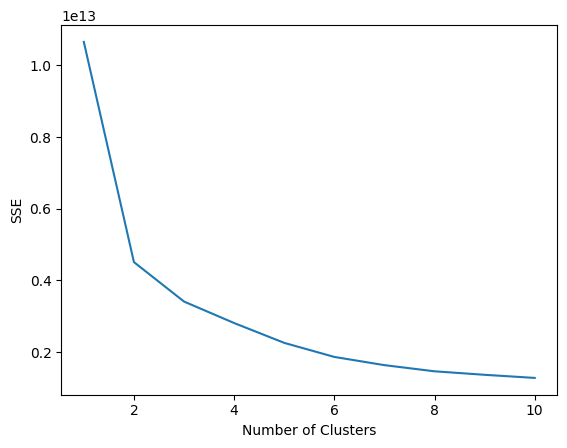

In [ ]:
# manually visualize the elbow method using plotlib
plt.plot(range(1,11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## K-Means Algorithm Clustering

In [ ]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random',max_iter=300,random_state=42)

y_pred = kmeans.fit_predict(df_encoded)

y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([1, 1, 1, ..., 0, 1, 2], dtype=int32)

In [ ]:
# Initialize the scaler
sc = StandardScaler()

# Fit the scaler on the entire df_encoded DataFrame (assuming all columns were scaled)
sc.fit(df_encoded)

# Create a copy of df_encoded for inverse transformation
df_inverse = df_encoded

# Apply inverse transformation to all columns using sc.inverse_transform
df_inverse[:] = sc.inverse_transform(df_encoded)  # Applying to all columns

# Add Clustering
df_inverse['Cluster'] = y_pred

# Display the first few rows of the inverse-transformed dataframe
df_inverse.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-1688-2055755ea14f>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[13760369.59466598 19409741.95043961  3850152.27357714 ...
  3310329.77458396 10016253.11769184 25858744.42504271]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_inverse[:] = sc.inverse_transform(df_encoded)  # Applying to all columns
<ipython-input-1688-2055755ea14f>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7104452.3188014   820945.94255366 5094189.7669854  

,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords,Units_Per_Satisfaction,Units_Discount_Interaction,Budget_Effectiveness,Cluster
0,1.376037e+07,5.994048e+08,7.104452e+06,21629.925191,4.430598e+08,5.272226,1.275170e+06,1.80783,58.613136,1.451262e+06,779.539767,2041.109084,1.823653e+06,56327.471930,6.953673,1.496000,433.050383,4.407752e+06,8.423714,1
1,1.940974e+07,4.290847e+08,8.209459e+05,148126.139114,8.811025e+08,3.741960,2.936746e+05,1.80783,58.613136,1.237642e+06,521.358802,5636.592246,2.447599e+07,37655.009838,4.727286,3.745074,2224.712343,8.185002e+06,15.105331,1
2,3.850152e+06,3.209840e+08,5.094190e+06,77207.209111,9.301829e+08,4.584903,9.614995e+06,0.98840,109.358931,1.531922e+07,917.236282,9232.075408,4.033712e+05,60083.672006,6.953673,1.496000,1843.984176,2.458321e+07,19.398627,1
3,7.949339e+06,4.298970e+08,3.697057e+06,226571.159647,2.732882e+09,7.061860,5.613957e+06,1.80783,342.789587,1.413734e+06,659.055316,9175.004246,8.448747e+06,43452.763447,3.614093,2.620537,7174.178506,1.724558e+07,36.984655,2
4,1.204853e+07,5.205800e+08,1.177050e+06,23366.715313,2.340407e+09,7.334195,2.669013e+07,2.62726,312.342110,8.321730e+06,383.662287,3068.389987,2.147954e+07,48299.514904,4.727286,1.496000,1216.902490,3.136620e+06,27.521819,2


In [ ]:
# Assuming 'Cluster' is the column indicating cluster assignments

# Select relevant columns for summarization
relevant_columns = ['Budget', 'Clicks', 'Conversions', 'Revenue_Generated', 'ROI', 'Subscription_Tier',
                    'Subscription_Length', 'Units_Sold', 'Bundle_Price', 'Customer_Satisfaction_Post_Refund'] # Add other numeric columns if needed

# Group by 'Cluster' and calculate mean for each group
cluster_summary = df_inverse.groupby('Cluster')[relevant_columns].mean().reset_index()

# Add additional metrics if needed, e.g., size of each cluster
cluster_summary['Cluster_Size'] = df_inverse.groupby('Cluster').size().values

# Display the cluster summary
cluster_summary = cluster_summary.transpose()
cluster_summary


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2
Cluster,0.000000e+00,1.000000e+00,2.000000e+00
Budget,3.537405e+08,3.725106e+08,3.611432e+08
Clicks,3.578056e+06,3.575690e+06,3.545293e+06
Conversions,1.458349e+05,1.441457e+05,1.448504e+05
Revenue_Generated,1.418803e+09,4.969447e+08,2.370221e+09
ROI,6.355215e+00,6.312860e+00,6.325307e+00
Subscription_Tier,1.799325e+00,1.802715e+00,1.792953e+00
Subscription_Length,2.020428e+02,1.994946e+02,2.011001e+02
Units_Sold,5.780350e+03,5.855987e+03,5.903468e+03
Bundle_Price,3.562742e+04,3.596553e+04,3.590431e+04


In [ ]:
df_inverse.Cluster.value_counts()
# This clustering result gives the company a segmentation framework.
# Each cluster represents a group with similar characteristics,
# enabling the company to make data-driven decisions to optimize resources,
# improve customer engagement, and boost overall business performance.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Cluster,
1,3364
2,3360
0,3276


<ipython-input-60-a700db08d32e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Size', data=cluster_df, palette='viridis')


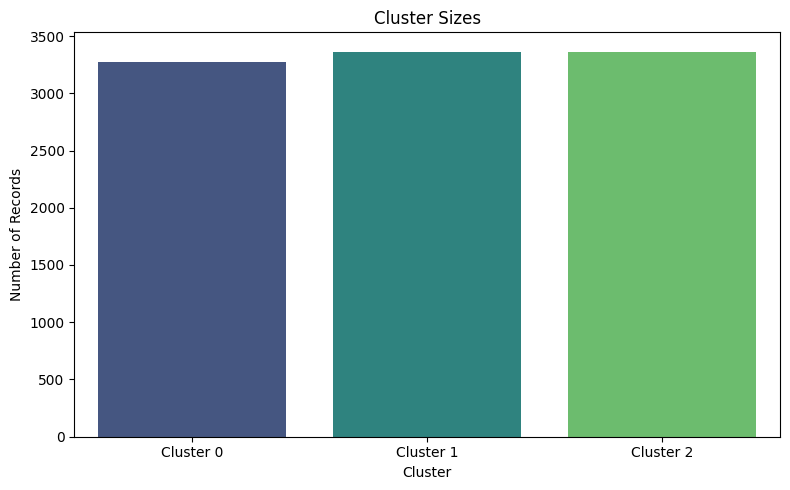

In [ ]:
# Box plot for Units Sold by Cluster
cluster_sizes = {'Cluster': ['Cluster 0', 'Cluster 1', 'Cluster 2'], 'Size': [3276, 3364, 3360]}
cluster_df = pd.DataFrame(cluster_sizes)

# Bar Chart: Cluster Sizes
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Size', data=cluster_df, palette='viridis')
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()

## Hierarchical Clustering

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


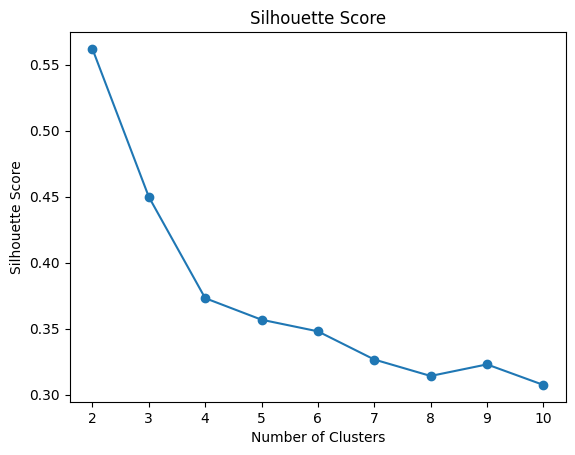

In [ ]:
silhouette_scores = []

for i in range(2, 11):
    cluster_labels = fcluster(linkage(df_inverse, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_inverse, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_encoded)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a copy of df_inverse for imputed transformation
df_imputed_inversed = df_inverse

# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe
df_imputed_inversed['KMeans'] = y_pred
df_imputed_inversed['Agglo'] = y_hc

# show the df
df_imputed_inversed.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,...,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords,Units_Per_Satisfaction,Units_Discount_Interaction,Budget_Effectiveness,Cluster,KMeans,Agglo
0,1.376037e+07,5.994048e+08,7.104452e+06,21629.925191,4.430598e+08,5.272226,1.275170e+06,1.80783,58.613136,1.451262e+06,...,1.823653e+06,56327.471930,6.953673,1.496000,433.050383,4.407752e+06,8.423714,1,1,1
1,1.940974e+07,4.290847e+08,8.209459e+05,148126.139114,8.811025e+08,3.741960,2.936746e+05,1.80783,58.613136,1.237642e+06,...,2.447599e+07,37655.009838,4.727286,3.745074,2224.712343,8.185002e+06,15.105331,1,1,1
2,3.850152e+06,3.209840e+08,5.094190e+06,77207.209111,9.301829e+08,4.584903,9.614995e+06,0.98840,109.358931,1.531922e+07,...,4.033712e+05,60083.672006,6.953673,1.496000,1843.984176,2.458321e+07,19.398627,1,1,1
3,7.949339e+06,4.298970e+08,3.697057e+06,226571.159647,2.732882e+09,7.061860,5.613957e+06,1.80783,342.789587,1.413734e+06,...,8.448747e+06,43452.763447,3.614093,2.620537,7174.178506,1.724558e+07,36.984655,2,2,0
4,1.204853e+07,5.205800e+08,1.177050e+06,23366.715313,2.340407e+09,7.334195,2.669013e+07,2.62726,312.342110,8.321730e+06,...,2.147954e+07,48299.514904,4.727286,1.496000,1216.902490,3.136620e+06,27.521819,2,2,0


In [ ]:
df_imputed_inversed.Agglo.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Agglo,
0,4389
1,3795
2,1816


Single Linkage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


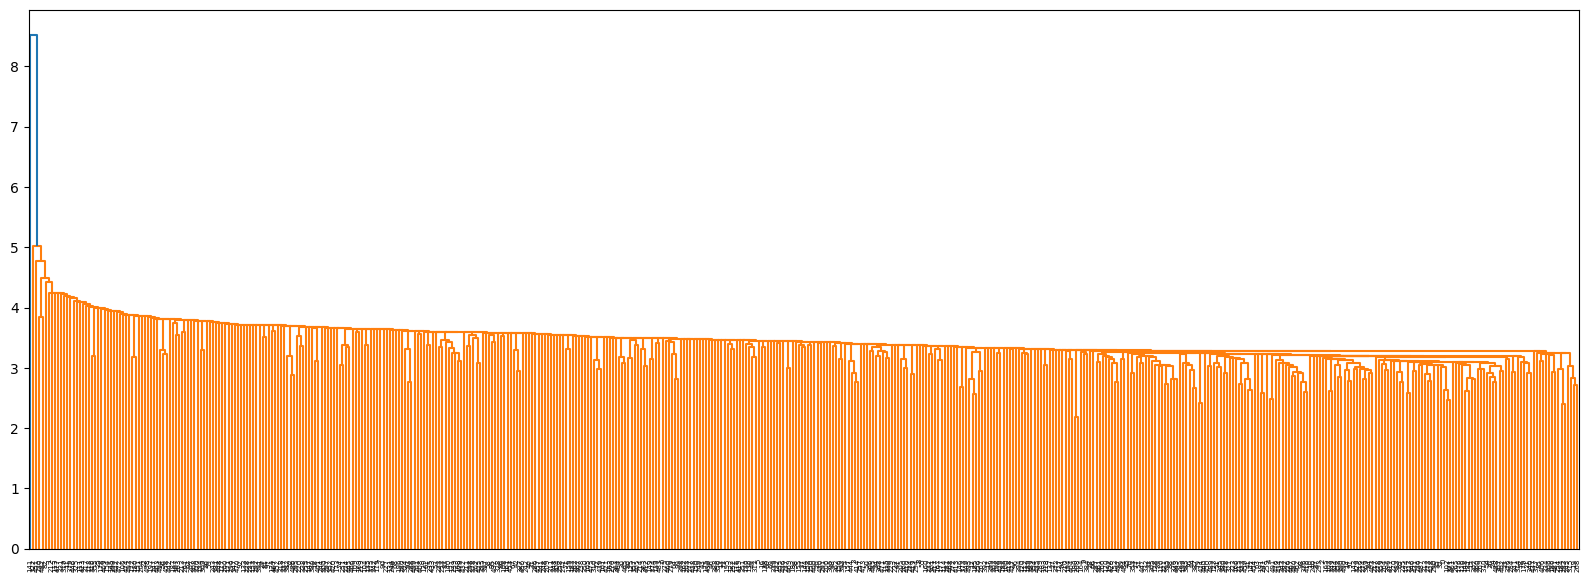

In [ ]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scaled, method='single')
dendrogram(linkage_data)
plt.show()

Complete Linkage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


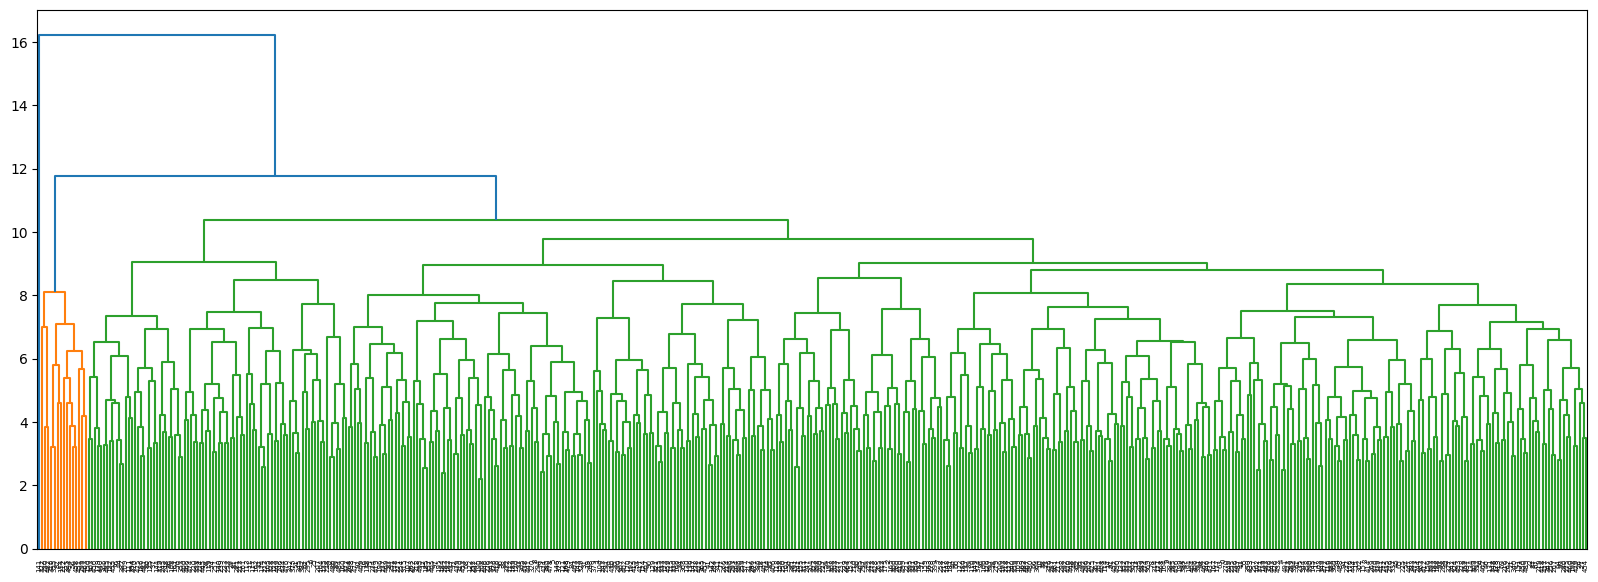

In [ ]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scaled, method='complete')
dendrogram(linkage_data)
plt.show()

Average Linkage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


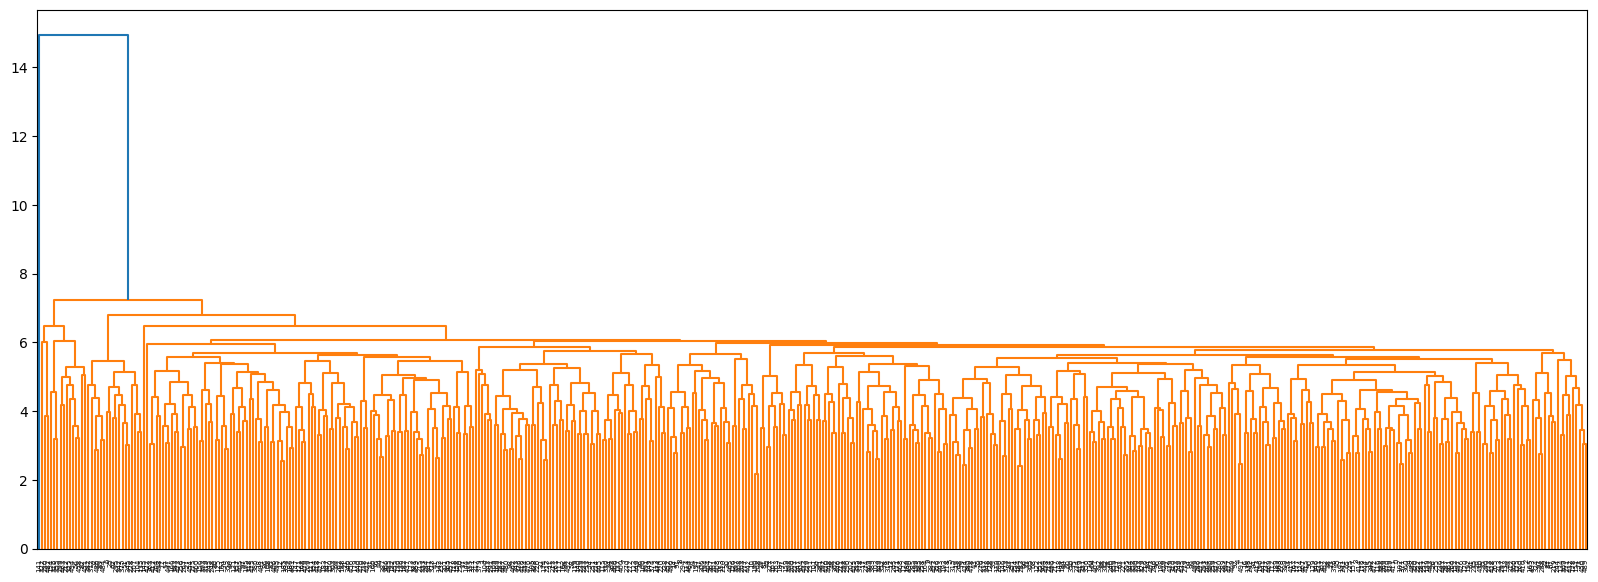

In [ ]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scaled, method='average')
dendrogram(linkage_data)
plt.show()

Ward Method

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


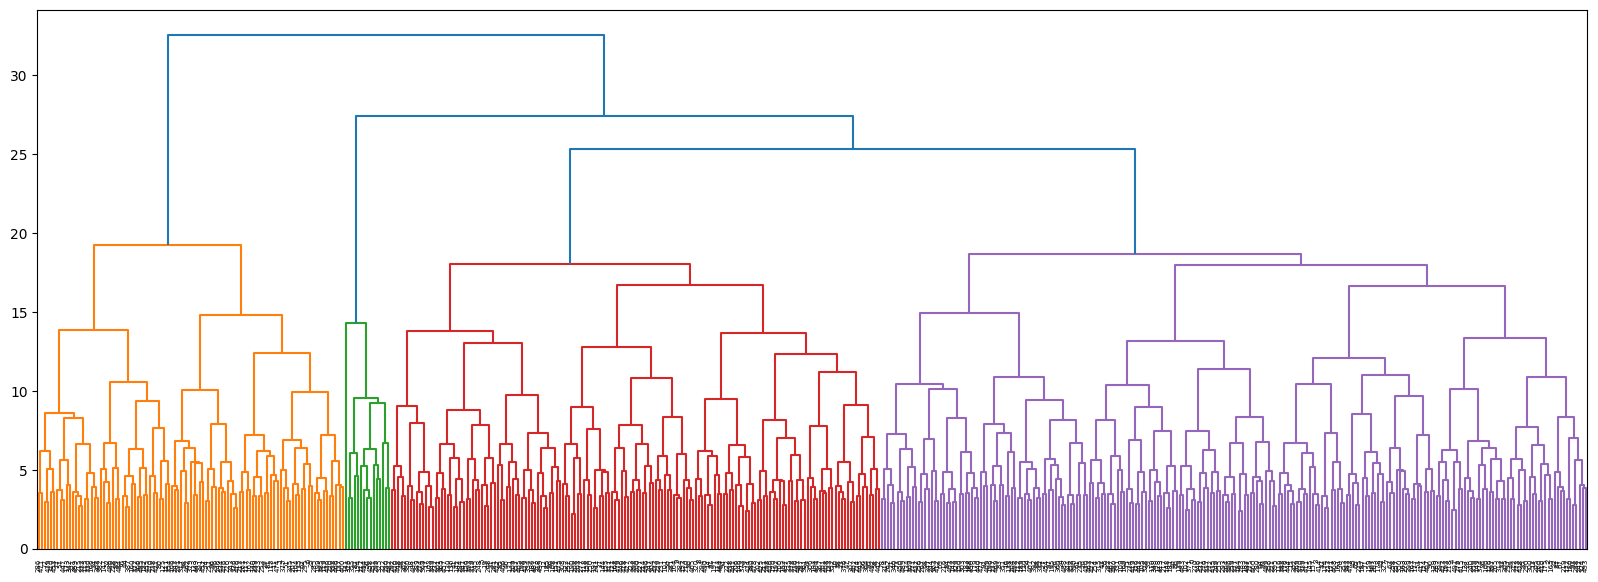

In [ ]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scaled, method='ward')
dendrogram(linkage_data)
plt.show()

**Final Conclusion**

Metode classification tidak cocok untuk dataset ini karena menghasilkan akurasi dan performa yang rendah, menunjukkan fitur-fitur data tidak cukup informatif untuk membedakan kategori. Sebaliknya, metode clustering seperti K-Means dan Hierarchical Clustering lebih efektif dalam mengungkap pola dan segmen data, memberikan wawasan yang berguna untuk mendukung pengambilan keputusan strategis dan optimasi sumber daya perusahaan.